# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:

fifa['Value'].unique()

fifa['ValueNumeric'] = pd.to_numeric(fifa['Value'].str.strip('€MK'))

fifa['ValueNumeric'].dtypes

dtype('float64')

In [5]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
# Your code here:

model = ols("fifa.ValueNumeric ~ C(fifa.Position)+ C(fifa['Preferred Foot']) ", data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fifa.Position),8.767522e+06,26.0,4.031426,2.192419e-11
C(fifa['Preferred Foot']),7.292211e+04,1.0,0.871795,3.504713e-01
Residual,1.515581e+09,18119.0,NaN,NaN


In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      fifa.ValueNumeric   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.020
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           1.07e-11
Time:                        14:12:20   Log-Likelihood:            -1.2858e+05
No. Observations:               18147   AIC:                         2.572e+05
Df Residuals:                   18119   BIC:                         2.574e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            251.0971     10.286     24.412      0.000     230.936     271.258
C(fifa.Position)[T.CB]                44.8343     11.600      3.865      0.000      22.098      67.571
C(fifa.Position)[T.CDM]               41.2222     13.273      3.106      0.002      15.206      67.238
C(fifa.Position)[T.CF]                12.8205     34.895      0.367      0.713     -55.578      81.219
C(fifa.Position)[T.CM]                19.0509     12.149      1.568      0.117      -4.761      42.863
C(fifa.Position)[T.GK]               -12.3903     11.383     -1.089      0.276     -34.701       9.921
C(fifa.Position)[T.LAM]             -147.9474     63.807     -2.319      0.020    -273.015     -22.879
C(fifa.Position)[T.LB]                40.6085     12.787      3.176      0.001      15.545      65.672
C(fifa.Position)[T.LCB]                5.4264     14.733      0.368      0.713     -23.452      34.305
C(fifa.Position)[T.LCM]              -14.3957     17.294     -0.832      0.405     -48.294      19.503
C(fifa.Position)[T.LDM]               15.4558     20.777      0.744      0.457     -25.269      56.181
C(fifa.Position)[T.LF]              -136.3208     75.259     -1.811      0.070    -283.835      11.193
C(fifa.Position)[T.LM]                19.9901     12.811      1.560      0.119      -5.120      45.100
C(fifa.Position)[T.LS]               -25.1392     22.177     -1.134      0.257     -68.607      18.329
C(fifa.Position)[T.LW]                16.5696     17.518      0.946      0.344     -17.767      50.906
C(fifa.Position)[T.LWB]                2.5676     34.223      0.075      0.940     -64.513      69.649
C(fifa.Position)[T.RAM]             -136.7902     63.807     -2.144      0.032    -261.858     -11.722
C(fifa.Position)[T.RB]                41.0541     12.424      3.304      0.001      16.701      65.407
C(fifa.Position)[T.RCB]               15.6503     14.674      1.067      0.286     -13.111      44.412
C(fifa.Position)[T.RCM]               -6.0397     17.382     -0.347      0.728     -40.111      28.031
C(fifa.Position)[T.RDM]              -14.6108     20.631     -0.708      0.479     -55.050      25.828
C(fifa.Position)[T.RF]              -129.2792     72.908     -1.773      0.076    -272.186      13.628
C(fifa.Position)[T.RM]                19.2603     12.720      1.514      0.130      -5.672      44.192
C(fifa.Position)[T.RS]                -7.0781     22.352     -0.317      0.752     -50.890      36.734
C(fifa.Position)[T.RW]                 9.8496     17.703      0.556      0.578     -24.849      44.548
C(fifa.Position)[T.RWB]               31.0871     32.411      0.959      0.337     -32.441      94.615
C(fifa.Position)[T.ST]                25.3325     11.259      2.250      0.024       3.263      

What is your conclusion from this ANOVA?

En este caso el value es menor que 0,05, por lo tanto la nacionalidad SI influye en el ValueNumeric

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [8]:
# Your code here:
fifa.dropna(inplace=True)
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [12]:
# Your code here:
X = sm.add_constant(fifa[['Stamina','SprintSpeed']])
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
model


In [13]:
predictions = model.predict(X) 
predictions.head()

0    270.582744
1    263.898502
2    267.201214
3    276.664138
4    258.084594
dtype: float64

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0116
Time:                        14:14:23   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [15]:
# Your code here:

X = sm.add_constant(fifa.Potential)
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
model

In [16]:
predictions = model.predict(X) 
predictions.head()

0    15.969391
1    15.969391
2    27.101964
3    27.101964
4    38.234537
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          9.15e-225
Time:                        14:15:55   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

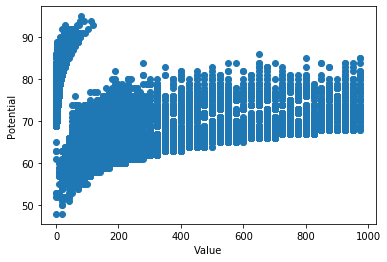

In [18]:
# Your code here:
import matplotlib.pyplot as plt


X = fifa.ValueNumeric.values
Y = fifa.Potential.values

plt.xlabel('Value')
plt.ylabel('Potential')


plt.scatter(X, Y);